In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
url = 'D:\wine project\winequality-red.csv'
wine_data = pd.read_csv(url, sep=';')

<>:1: SyntaxWarning: invalid escape sequence '\w'
<>:1: SyntaxWarning: invalid escape sequence '\w'
C:\Users\kalya\AppData\Local\Temp\ipykernel_15320\1819555745.py:1: SyntaxWarning: invalid escape sequence '\w'
  url = 'D:\wine project\winequality-red.csv'


In [3]:
wine_data.shape

(1599, 1)

In [4]:
wine_data.head()

,"fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality"
0,"7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0...."
1,"7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.2,0...."
2,"7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0..."
3,"11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,..."
4,"7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0...."


In [5]:
wine_data.tail()

,"fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality"
1594,"6.2,0.6,0.08,2.0,0.09,32.0,44.0,0.9949,3.45,0...."
1595,"5.9,0.55,0.1,2.2,0.062,39.0,51.0,0.99512000000..."
1596,"6.3,0.51,0.13,2.3,0.076,29.0,40.0,0.99574,3.42..."
1597,"5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.995470000..."
1598,"6.0,0.31,0.47,3.6,0.067,18.0,42.0,0.99549,3.39..."


In [6]:
wine_data.isnull().sum()

fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality    0
dtype: int64

In [7]:
wine_data.describe()

,"fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality"
count,1599
unique,1359
top,"7.2,0.36,0.46,2.1,0.07400000000000001,24.0,44...."
freq,4


In [8]:
wine_data = wine_data['fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality'].str.split(',', expand=True)


In [9]:
new_columns = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

In [10]:
wine_data.columns = new_columns

In [11]:
wine_data['quality'] = wine_data['quality'].astype(int)

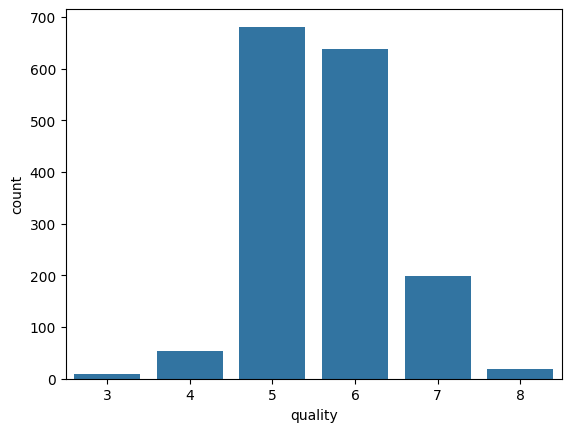

In [12]:
sns.countplot(x='quality', data=wine_data)
plt.show()

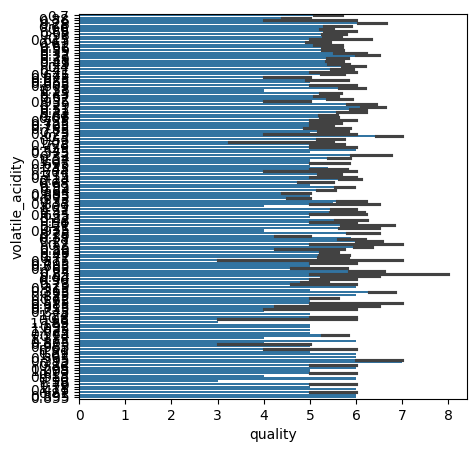

In [13]:
plot = plt.figure(figsize=(5, 5))
sns.barplot(x='quality', y='volatile_acidity', data=wine_data)
plt.show()

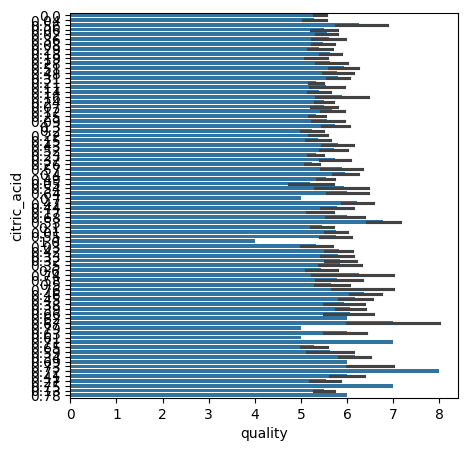

In [14]:
plot = plt.figure(figsize=(5, 5))
sns.barplot(x='quality', y='citric_acid', data=wine_data)
plt.show()

In [15]:
correlation = wine_data.corr()

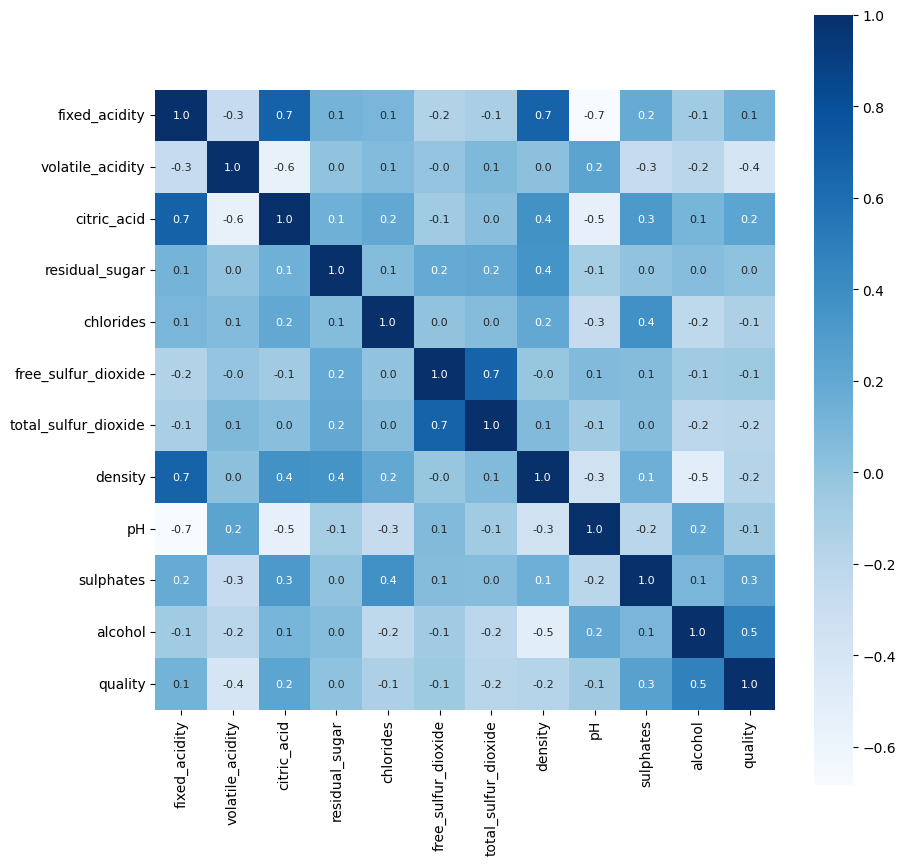

In [16]:
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Blues')
plt.show()

In [17]:
X = wine_data.drop('quality', axis=1)

In [18]:
print(X)

     fixed_acidity volatile_acidity citric_acid residual_sugar chlorides  \
0              7.4              0.7         0.0            1.9     0.076   
1              7.8             0.88         0.0            2.6     0.098   
2              7.8             0.76        0.04            2.3     0.092   
3             11.2             0.28        0.56            1.9     0.075   
4              7.4              0.7         0.0            1.9     0.076   
...            ...              ...         ...            ...       ...   
1594           6.2              0.6        0.08            2.0      0.09   
1595           5.9             0.55         0.1            2.2     0.062   
1596           6.3             0.51        0.13            2.3     0.076   
1597           5.9            0.645        0.12            2.0     0.075   
1598           6.0             0.31        0.47            3.6     0.067   

     free_sulfur_dioxide total_sulfur_dioxide             density    pH  \
0           

In [19]:
Y = wine_data['quality'].astype(int).apply(lambda y_value: 1 if y_value >= 7 else 0)

In [20]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

In [24]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print(f"Test Data Accuracy: {test_data_accuracy}")

Test Data Accuracy: 0.940625


In [25]:
import pickle
pickle.dump(model,open('model.pkl','wb'))
pickle.dump(scaler,open('scaler.pkl','wb'))

In [26]:
model = pd.read_pickle("model.pkl")
scaler = pd.read_pickle("scaler.pkl")